# Support Vector Classifier [SVC]

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_classes=2,
    n_clusters_per_class=1,
    n_redundant=0,
    random_state=42,
)

In [69]:
pd.DataFrame(X)[0]

0      0.601034
1      0.755945
2      1.354479
3      3.103090
4      0.753178
         ...   
995    1.713939
996    1.509473
997    2.844315
998   -0.025876
999    3.641478
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

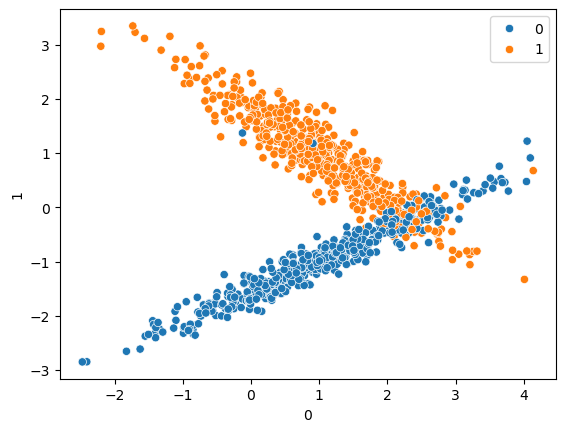

In [70]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [72]:
from sklearn.svm import SVC

# If Data Clearly Seperable use linear Kernel
svc = SVC(kernel="linear")

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
classi_rep = classification_report(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
print(accuracy)
print(classi_rep)
print(conf_mat)

0.912
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       124
           1       0.99      0.83      0.91       126

    accuracy                           0.91       250
   macro avg       0.92      0.91      0.91       250
weighted avg       0.92      0.91      0.91       250

[[123   1]
 [ 21 105]]


In [73]:
from sklearn.svm import SVC

# If Data Clearly Seperable use linear Kernel
rbf = SVC(kernel="rbf")

rbf.fit(X_train, y_train)
y_pred1 = rbf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy = accuracy_score(y_test, y_pred1)
classi_rep = classification_report(y_test, y_pred1)
conf_mat = confusion_matrix(y_test, y_pred1)
print(accuracy)
print(classi_rep)
print(conf_mat)

0.916
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       124
           1       0.99      0.84      0.91       126

    accuracy                           0.92       250
   macro avg       0.93      0.92      0.92       250
weighted avg       0.93      0.92      0.92       250

[[123   1]
 [ 20 106]]


In [74]:
from sklearn.svm import SVC

# If Data Clearly Seperable use linear Kernel
poly = SVC(kernel="poly")

poly.fit(X_train, y_train)
y_pred2 = poly.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy = accuracy_score(y_test, y_pred2)
classi_rep = classification_report(y_test, y_pred2)
conf_mat = confusion_matrix(y_test, y_pred2)
print(accuracy)
print(classi_rep)
print(conf_mat)

0.9
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       124
           1       0.95      0.85      0.90       126

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[118   6]
 [ 19 107]]


In [75]:
from sklearn.svm import SVC

# If Data Clearly Seperable use linear Kernel
sigmoid = SVC(kernel="sigmoid")

sigmoid.fit(X_train, y_train)
y_pred3 = sigmoid.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy = accuracy_score(y_test, y_pred3)
classi_rep = classification_report(y_test, y_pred3)
conf_mat = confusion_matrix(y_test, y_pred3)
print(accuracy)
print(classi_rep)
print(conf_mat)

0.896
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       124
           1       0.95      0.83      0.89       126

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[119   5]
 [ 21 105]]


# HyperParameter Tuning with GridSearchCV

In [80]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.1, 1, 10, 100, 1000],
    "gamma": [0.1, 1, 10, 100, 1000],
    "kernel": ["rbf"],
}

grid = GridSearchCV(estimator=SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)

y_pred4 = grid.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy = accuracy_score(y_test, y_pred4)
classi_rep = classification_report(y_test, y_pred4)
conf_mat = confusion_matrix(y_test, y_pred4)
print(accuracy)
print(classi_rep)
print(conf_mat)

0.94
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       124
           1       0.97      0.90      0.94       126

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

[[121   3]
 [ 12 114]]


In [81]:
print(f"Best Params: {grid.best_params_} \nBest Score: {grid.best_score_.round(2)}")

Best Params: {'C': 10, 'gamma': 1, 'kernel': 'rbf'} 
Best Score: 0.95
